In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
from datetime import date
from ast import literal_eval
import numpy as np
import ast 
import re


# Data Extraction

In [2]:
Data = pd.read_csv("5k_borrowers_data.csv")
Data.info()   #There are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          5000 non-null   object 
 1   Date of Birth                 5000 non-null   object 
 2   Gender                        5000 non-null   object 
 3   Marital Status                5000 non-null   object 
 4   Phone Number                  5000 non-null   int64  
 5   Email Address                 5000 non-null   object 
 6   Mailing Address               5000 non-null   object 
 7   Language Preference           5000 non-null   object 
 8   Geographical Location         5000 non-null   object 
 9   Credit Score                  5000 non-null   int64  
 10  Loan Type                     5000 non-null   object 
 11  Loan Amount                   5000 non-null   int64  
 12  Loan Term                     5000 non-null   int64  
 13  Int

In [3]:
Data.head(5)

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
0,Khushi Balan,19-02-1986,Male,Single,2169182416,xbhakta@example.com,"29/74, Mander, Kulti 156906",Marathi,Danapur,491,...,34398,15,0.16,Medical Emergency,2545.36,10.65.217.95,"-49.3275015, 58.067192","[{'Payment Date': datetime.date(2023, 5, 3), '...",2,No
1,Umang Chatterjee,13-08-1980,Male,Married,4521712306,ivaidya@example.org,73/885\nSharma Marg\nSolapur 386449,Malayalam,Bangalore,325,...,96856,9,0.20,Home Renovation,11678.35,192.168.179.132,"14.951437, -136.491335","[{'Payment Date': datetime.date(2023, 5, 1), '...",4,Yes
2,Adira Dara,05-08-1995,Female,Widowed,4615155004,loyalvihaan@example.net,H.No. 468\nRaval Zila\nNanded 490253,Malayalam,Bijapur,624,...,91301,10,0.16,Home Renovation,9812.94,10.166.34.134,"64.013123, 175.275587","[{'Payment Date': datetime.date(2023, 5, 7), '...",7,No
3,Anvi Saini,16-11-2001,Male,Married,914836846677,tgaba@example.org,"04/25, Mandal Path, Guntakal 305639",Gujarati,Korba,346,...,78981,14,0.28,Education Fees,6678.01,10.107.161.197,"-11.6130395, 37.595772","[{'Payment Date': datetime.date(2023, 5, 10), ...",7,Yes
4,Kartik Kade,09-07-1979,Male,Widowed,910186397558,sanakaur@example.net,"55/13, Srivastava Path\nRaipur-801775",Malayalam,Jorhat,321,...,89953,1,0.29,Wedding Expenses,92126.86,192.168.255.28,"-71.7186905, 49.352990",[],11,No


In [4]:
#The date format should be converted to dd/mm/yy format so that we can able to access them in future.

Data['Repayment History'] .head(10)

0    [{'Payment Date': datetime.date(2023, 5, 3), '...
1    [{'Payment Date': datetime.date(2023, 5, 1), '...
2    [{'Payment Date': datetime.date(2023, 5, 7), '...
3    [{'Payment Date': datetime.date(2023, 5, 10), ...
4                                                   []
5    [{'Payment Date': datetime.date(2023, 5, 25), ...
6    [{'Payment Date': datetime.date(2023, 5, 12), ...
7    [{'Payment Date': datetime.date(2023, 5, 6), '...
8    [{'Payment Date': datetime.date(2023, 5, 22), ...
9    [{'Payment Date': datetime.date(2023, 5, 17), ...
Name: Repayment History, dtype: object

# Data Transformation

In [5]:
#Replacing the empty array"[]" with assumed date 28/2/3252, to just make the data loadable in the database.
#There are total of 775 records where the repayment history is missing. With this assumed  date we can infer that they havent paid yet.

def replace_empty_with_default(s):
    if s.strip() == "[]":
        return "[{'Payment Date': datetime.date(3252, 2, 28), 'Payment Mode': 'None'}]"
    else:
        return s

# Apply the function to 'Repayment History' column
Data['Repayment History'] = Data['Repayment History'].apply(replace_empty_with_default)

In [6]:
#It is found that the data were in string format, so to process the data it should be in dictionary form
#So at the first step here we are striping the square brackets from the data

import ast
def process_string(s):
    # Remove '[' and ']' and convert to list   
    s = s.strip('[]')
      
    # Use eval to convert string to dictionary
    return eval(s)


# Apply the function to 'Repayment History' column
Data['Repayment History'] = Data['Repayment History'].apply(process_string)
Data['Repayment History']

0       ({'Payment Date': 2023-05-03, 'Payment Mode': ...
1       ({'Payment Date': 2023-05-01, 'Payment Mode': ...
2       ({'Payment Date': 2023-05-07, 'Payment Mode': ...
3       ({'Payment Date': 2023-05-10, 'Payment Mode': ...
4       {'Payment Date': 3252-02-28, 'Payment Mode': '...
                              ...                        
4995    {'Payment Date': 2023-05-28, 'Payment Mode': '...
4996    {'Payment Date': 2023-05-19, 'Payment Mode': '...
4997    {'Payment Date': 2023-05-03, 'Payment Mode': '...
4998    {'Payment Date': 2023-05-21, 'Payment Mode': '...
4999    {'Payment Date': 3252-02-28, 'Payment Mode': '...
Name: Repayment History, Length: 5000, dtype: object

In [7]:
# Here we are adding the sqare bracket to enclose them into list, Now we have converted it from string to proper dictionary.
Data['Repayment History'] = Data['Repayment History'].apply(lambda x: [x])
Data['Repayment History']

0       [({'Payment Date': 2023-05-03, 'Payment Mode':...
1       [({'Payment Date': 2023-05-01, 'Payment Mode':...
2       [({'Payment Date': 2023-05-07, 'Payment Mode':...
3       [({'Payment Date': 2023-05-10, 'Payment Mode':...
4       [{'Payment Date': 3252-02-28, 'Payment Mode': ...
                              ...                        
4995    [{'Payment Date': 2023-05-28, 'Payment Mode': ...
4996    [{'Payment Date': 2023-05-19, 'Payment Mode': ...
4997    [{'Payment Date': 2023-05-03, 'Payment Mode': ...
4998    [{'Payment Date': 2023-05-21, 'Payment Mode': ...
4999    [{'Payment Date': 3252-02-28, 'Payment Mode': ...
Name: Repayment History, Length: 5000, dtype: object

In [8]:
# Here we are defining a Function to convert date to dd/mm/yy format for all the rows in 'Repayment History' column where there is only single dictionary.
#In later part of the code we will also take care of the data which has multiple dictionaries.

def format_payment_date(payment_dict):
    if 'Payment Date' in payment_dict and isinstance(payment_dict['Payment Date'], datetime.date):
        payment_dict['Payment Date'] = payment_dict['Payment Date'].strftime('%d/%m/%y')
    return payment_dict


Data['Repayment History'] = Data['Repayment History'].apply(lambda payments: [format_payment_date(payment) for payment in payments])

Data['Repayment History']

0       [({'Payment Date': 2023-05-03, 'Payment Mode':...
1       [({'Payment Date': 2023-05-01, 'Payment Mode':...
2       [({'Payment Date': 2023-05-07, 'Payment Mode':...
3       [({'Payment Date': 2023-05-10, 'Payment Mode':...
4       [{'Payment Date': '28/02/52', 'Payment Mode': ...
                              ...                        
4995    [{'Payment Date': '28/05/23', 'Payment Mode': ...
4996    [{'Payment Date': '19/05/23', 'Payment Mode': ...
4997    [{'Payment Date': '03/05/23', 'Payment Mode': ...
4998    [{'Payment Date': '21/05/23', 'Payment Mode': ...
4999    [{'Payment Date': '28/02/52', 'Payment Mode': ...
Name: Repayment History, Length: 5000, dtype: object

In [9]:
#This part of code is to convert dictionary to string so that it can be loaded in the database.
#sqllite database is not accepting dicionary, it is accepting only data in string format for 'Repayment History' column

import json

Data['Repayment History'] = Data['Repayment History'].apply(lambda x: json.dumps(x, default=str))

In [10]:
#The rows with single dictionary has date in dd/mm/yy format but rows with multiple dictionary is not in dd/mm/yy format,
#so in this section we are converting all the rows to dd/mm/yy format



from datetime import datetime
def fix_date_strings(rep_hist_str):

    rep_hist_str = re.sub(r'(?<=: )(\d{2}/\d{2}/\d{2})(?=[,}])', r'"\1"', rep_hist_str)
    rep_hist_str = re.sub(r'(?<=: )(\d{4}-\d{2}-\d{2})(?=[,}])', r'"\1"', rep_hist_str)
    return rep_hist_str

def convert_date_format(rep_hist_str):
    rep_hist_str = fix_date_strings(rep_hist_str)
    rep_hist_list = ast.literal_eval(rep_hist_str)
    new_rep_hist_list = []
    for entry in rep_hist_list:
        if isinstance(entry, list):
            new_entry = []
            for sub_entry in entry:
                date_str = sub_entry['Payment Date']
                if '-' in date_str:
                    new_date_str = datetime.strptime(date_str, '%Y-%m-%d').strftime('%d/%m/%y')
                else:
                    new_date_str = datetime.strptime(date_str, '%d/%m/%y').strftime('%d/%m/%y')
                new_entry.append({'Payment Date': new_date_str, 'Payment Mode': sub_entry['Payment Mode']})
            new_rep_hist_list.append(new_entry)
        else:
            date_str = entry['Payment Date']
            new_date_str = datetime.strptime(date_str, '%d/%m/%y').strftime('%d/%m/%y')
            new_rep_hist_list.append({'Payment Date': new_date_str, 'Payment Mode': entry['Payment Mode']})
    return str(new_rep_hist_list)

Data['Repayment History'] = Data['Repayment History'].apply(convert_date_format)
Data['Repayment History'] 

0       [[{'Payment Date': '03/05/23', 'Payment Mode':...
1       [[{'Payment Date': '01/05/23', 'Payment Mode':...
2       [[{'Payment Date': '07/05/23', 'Payment Mode':...
3       [[{'Payment Date': '10/05/23', 'Payment Mode':...
4       [{'Payment Date': '28/02/52', 'Payment Mode': ...
                              ...                        
4995    [{'Payment Date': '28/05/23', 'Payment Mode': ...
4996    [{'Payment Date': '19/05/23', 'Payment Mode': ...
4997    [{'Payment Date': '03/05/23', 'Payment Mode': ...
4998    [{'Payment Date': '21/05/23', 'Payment Mode': ...
4999    [{'Payment Date': '28/02/52', 'Payment Mode': ...
Name: Repayment History, Length: 5000, dtype: object

In [11]:
import re

#This code is to count the number of times the EMI has been paid

def count_payment_dates(rep_hist_str):
    # Add quotes around unquoted date strings
    rep_hist_str = re.sub(r'(?<=: )(\d{2}/\d{2}/\d{2})(?=[,}])', r'"\1"', rep_hist_str)
    # Parse the string representation to a list
    rep_hist_list = ast.literal_eval(rep_hist_str)
    
    # Flatten the list if it contains nested lists
    if isinstance(rep_hist_list, list) and all(isinstance(i, list) for i in rep_hist_list):
        rep_hist_list = [item for sublist in rep_hist_list for item in sublist]

    # Count the number of 'Payment Date' entries
    return sum('Payment Date' in d for d in rep_hist_list)

Data['Number_of_EMI_paid'] = Data['Repayment History'].apply(count_payment_dates)

Data['Monthly Interest Rate'] = Data['Interest Rate'] / 12

#Here we are calculating outstanding amount and having it in a separate column

Data['Outstanding_Balance'] = Data.apply(
    lambda row: row['Loan Amount'] * (
        ((1 + row['Monthly Interest Rate']) ** row['Loan Term'] - (1 + row['Monthly Interest Rate']) ** row['Number_of_EMI_paid']) /
        ((1 + row['Monthly Interest Rate']) ** row['Loan Term'] - 1)
    ),
    axis=1
)

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          5000 non-null   object 
 1   Date of Birth                 5000 non-null   object 
 2   Gender                        5000 non-null   object 
 3   Marital Status                5000 non-null   object 
 4   Phone Number                  5000 non-null   int64  
 5   Email Address                 5000 non-null   object 
 6   Mailing Address               5000 non-null   object 
 7   Language Preference           5000 non-null   object 
 8   Geographical Location         5000 non-null   object 
 9   Credit Score                  5000 non-null   int64  
 10  Loan Type                     5000 non-null   object 
 11  Loan Amount                   5000 non-null   int64  
 12  Loan Term                     5000 non-null   int64  
 13  Int

Formula to calculate Outstanding amount

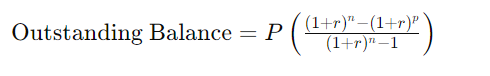

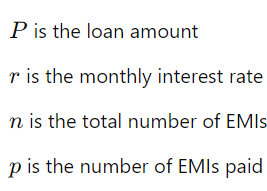

# Data Loading to SQLlite database

In [12]:
#Here we are using sqllite as the source of database.
#Required libraries are loaded and database name is '5K_borrowers' and the table name is 'borrowers'

!pip install PyMySQL
!pip install sqlalchemy
import sqlalchemy
import sqlite3
from sqlalchemy import create_engine

engine = sqlalchemy.create_engine('sqlite:///5K_borrowers.db')
Data.to_sql('borrowers', con=engine, index=False, if_exists='replace')

5000

# Querying required data



# a. What is the average loan amount for borrowers who are more than 5 days past due?

In [13]:
AVG_Loan_amount_5days_past_due_query = """
SELECT AVG("Loan Amount") AS average_loan_amount
FROM borrowers
WHERE "Days Left to Pay Current EMI" <= -5
"""


AVG_Loan_amount_5days_past_due = pd.read_sql(AVG_Loan_amount_5days_past_due_query, con=engine)
AVG_Loan_amount_5days_past_due



,average_loan_amount
0,None


Since the 'Days Left to Pay Current EMI' column is in positive value we are getting no data for average loan amount for more than 5days past due

# b. Who are the top 10 borrowers with the highest outstanding balance?

These are the 10 borrowers with highest outstanding history.Vaibhav Sharaf stands top

In [14]:
TOP_10_Outstanding_balance_query = "SELECT Name FROM borrowers ORDER BY Outstanding_Balance DESC Limit 10"

TOP_10_Outstanding_balance = pd.read_sql(TOP_10_Outstanding_balance_query, con=engine)
TOP_10_Outstanding_balance

,Name
0,Vaibhav Sharaf
1,Anahi Tank
2,Kanav Chowdhury
3,Hrishita Babu
4,Drishya Grover
5,Damini Doshi
6,Ritvik Sengupta
7,Ira Sama
8,Faiyaz Salvi
9,Samarth Sachar


# c  List of all borrowers with good repayment history

The assumption here I have done is I have considered people who has dome repayment twice in good condition.

3455 borrowers has good repayment history

In [15]:

names_with_Good_repayment_history_query = "SELECT Name FROM borrowers where Number_of_EMI_paid >= 2 ORDER BY Number_of_EMI_paid DESC "


names_with_Good_repayment_history = pd.read_sql(names_with_Good_repayment_history_query, con=engine)
names_with_Good_repayment_history

,Name
0,Mishti Lall
1,Ryan Grewal
2,Tarini Bhatia
3,Tiya Sarna
4,Rohan Bahl
...,...
3450,Lakshay Walia
3451,Manjari Behl
3452,Vardaniya Chhabra
3453,Kismat Kurian


# d  Brief analysis wrt loan type

By the Below query results we can infer that 
the most borrowers opted for Auto Loan are malayalies,
the most borrowers opted for Personal Loan are Bengalies
and most borrowers opted for Home Loan are Telugu speakers.

And the suspicious thing ithat we can infer after the analysis is, 305 borrowers have opted for home loan for medical emergency purpose which we shall introspect.

In [16]:
query_Auto_Loan = """
SELECT "Language Preference", COUNT(*) AS count
FROM borrowers 
WHERE "Loan Type" = 'Auto Loan'
GROUP BY "Language Preference"
ORDER BY count
DESC
"""


Auto_loan_query = pd.read_sql(query_Auto_Loan, con=engine)
Auto_loan_query




,Language Preference,count
0,Malayalam,187
1,Hindi,173
2,Urdu,170
3,Marathi,170
4,Gujarati,168
5,English,165
6,Bengali,163
7,Tamil,162
8,Telugu,161
9,Kannada,141


In [17]:
query_personalloan = """
SELECT "Language Preference", COUNT(*) AS count
FROM borrowers 
WHERE "Loan Type" = 'Personal Loan'
GROUP BY "Language Preference"
ORDER BY count
DESC
"""
personal_loan_query = pd.read_sql(query_personalloan, con=engine)
personal_loan_query

,Language Preference,count
0,Bengali,201
1,Malayalam,197
2,Urdu,178
3,Telugu,175
4,Tamil,175
5,Hindi,166
6,English,154
7,Marathi,146
8,Gujarati,145
9,Kannada,143


In [18]:
query_home_loan = """
SELECT "Language Preference", COUNT(*) AS count
FROM borrowers 
WHERE "Loan Type" = 'Home Loan'
GROUP BY "Language Preference"
ORDER BY count
DESC
"""
home_loan_query = pd.read_sql(query_home_loan, con=engine)
home_loan_query

,Language Preference,count
0,Telugu,182
1,Marathi,179
2,Urdu,173
3,Tamil,169
4,Kannada,169
5,English,168
6,Malayalam,165
7,Gujarati,161
8,Hindi,155
9,Bengali,139


In [19]:
query_home_loan_medical = """
SELECT Name
FROM borrowers 
WHERE "Loan Type" = 'Home Loan'
AND "Loan Purpose" = 'Medical Emergency'
ORDER BY "Loan Amount"
DESC
"""
home_loan_medical_query = pd.read_sql(query_home_loan_medical, con=engine)
home_loan_medical_query

,Name
0,Shlok Kothari
1,Shamik Gaba
2,Romil Wali
3,Kimaya Contractor
4,Anahi Tank
...,...
300,Hunar Shah
301,Hrishita Cheema
302,Arnav Tank
303,Raghav Toor


# Saving sql files

In [20]:
import os
print(os.getcwd())


C:\Users\Aditya Gireesh S\Predixion


In [21]:

# Function to save a query to a file
def save_query_to_file(query, filename):
    with open(filename, 'w') as file:
        file.write(query)

# Save queries to .sql files
save_query_to_file(AVG_Loan_amount_5days_past_due_query, 'AVG_Loan_amount_5days_past_due_query.sql')
save_query_to_file(TOP_10_Outstanding_balance_query, 'TOP_10_Outstanding_balance_query.sql')
save_query_to_file(names_with_Good_repayment_history_query, 'names_with_Good_repayment_history_query.sql')

save_query_to_file(query_personalloan, 'personal_loan_query.sql')
save_query_to_file(query_home_loan, 'home_loan_query.sql')
save_query_to_file(query_Auto_Loan, 'auto_loan_query.sql')
